In [4]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
api = wandb.Api()

SUCCESS_RATE  = "Sample Trajectories.Success Rate"

Problem Statements
---------------------------

**Near mastery instability:**
Past runs have become unstable after reaching a success rate of above 95%, causing the success rate to drop significantly. We must find way to stabilize this behaviour.

Approach
---------------
Analise metrics just befor and after the moment of the creash

In [32]:
run = api.run(
    path="cthoens/Workbook/itcoqu4p",
)
full_disc_reward = np.array([row[SUCCESS_RATE] for row in run.scan_history(keys=[SUCCESS_RATE])])

(0.8887744593202883, 0.97568093385214)

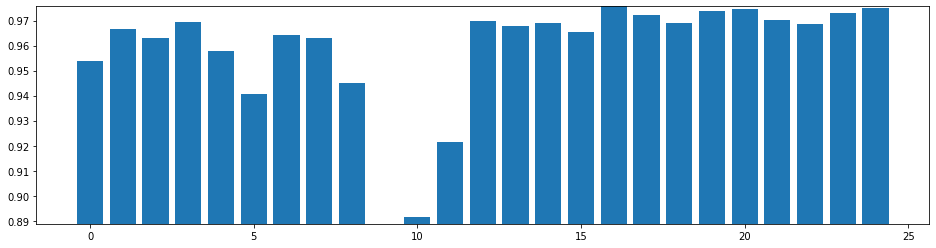

In [51]:
disc_reward = full_disc_reward[1425:1450]
plt.rcParams["figure.figsize"] = [16, 4]
#plt.plot(disc_reward)
plt.bar(np.arange(len(disc_reward), dtype=int), disc_reward)
plt.ylim([np.min(disc_reward), np.max(disc_reward)])

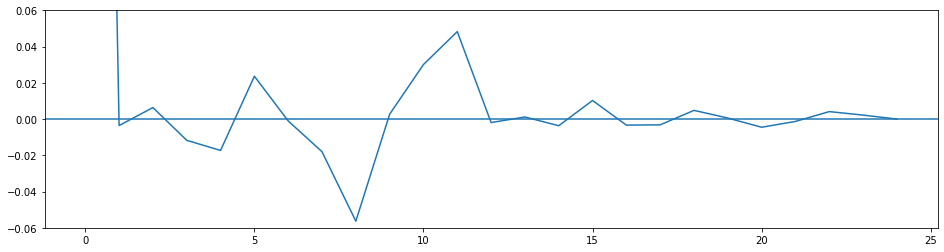

In [54]:
cell_size = 1
cell_count = len(disc_reward) // cell_size

change = np.zeros(cell_count)
last = change[:cell_size].mean()
for i in range(cell_count-1):
    current = disc_reward[(i+1)*cell_size: (i+2)*cell_size].mean()
    change[i] = current - last
    last = current
plt.plot(change)
plt.ylim([-0.06, 0.06])
plt.axhline(y=0)